In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
# For the following problems, use python to simulate the problem and calculate an 
# experimental probability, then compare that to the theoretical probability.

# Connect to the employees database and find the average salary of current employees, along with the standard deviation. Model the distribution of employees salaries with a normal distribution and answer the following questions:

# What percent of employees earn less than 60,000?
# What percent of employees earn more than 95,000?
# What percent of employees earn between 65,000 and 80,000?
# What do the top 5% of employees make?

<BarContainer object of 10 artists>

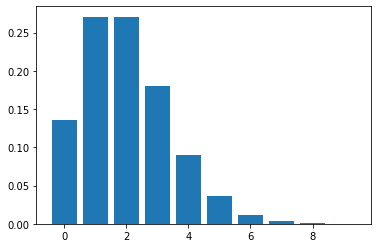

In [9]:
# # A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson
# distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions 
# concerning the probability of cars waiting at the drive-up window.

bank = stats.poisson(2)
x = range(0,10)
y = stats.poisson(2).pmf(x)
plt.bar(x, y)

In [20]:
# What is the probability that no cars drive up in the noon hour?
theory = stats.poisson(2).pmf(0)

sim_array = stats.poisson(2).rvs(10_000)
sim = (sim_array == 0).mean()

theory, sim

(0.1353352832366127, 0.1394)

In [23]:
# What is the probability that 3 or more cars come through the drive through?
theory = stats.poisson(2).sf(2.9)
sim_array = stats.poisson(2).rvs(10_000)
sim = (sim_array >= 3).mean()

theory, sim

(0.32332358381693654, 0.3208)

In [24]:
# How likely is it that the drive through gets at least 1 car?
theory = stats.poisson(2).sf(.9)
sim_array = stats.poisson(2).rvs(10_000)
sim = (sim_array >= 1).mean()

theory, sim

(0.8646647167633873, 0.867)

In [25]:
# Grades of State University graduates are normally distributed with a 
# mean of 3.0 and a standard deviation of .3. Calculate the following:

In [33]:
# What grade point average is required to be in the top 5% of the graduating class?
theory = stats.norm(3, .3).isf(.05)
sim_array = stats.norm(3, .3).rvs(10_000)
sim = np.percentile(sim_array, 95)
theory, sim

(3.4934560880854417, 3.4906678943003597)

In [34]:
# What GPA constitutes the bottom 15% of the class?
theory = stats.norm(3, .3).ppf(.15)
sim_array = stats.norm(3, .3).rvs(10_000)
sim = np.percentile(sim_array, 15)
theory, sim

(2.689069983151863, 2.678272389352623)

In [42]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
#1st decile 1 - 10 %
# 2nd decile 11 - 20%
# 3rd decile 21 - 30%
theory_low = stats.norm(3, .3).ppf(.2)
theory_high = stats.norm(3, .3).ppf(.3)
theory_third = [theory_high, theory_low]
sim_array = stats.norm(3, .3).rvs(10_000)
sim_low = np.percentile(sim_array, 20)
sim_high = np.percentile(sim_array, 30)
sim_third = [sim_high, sim_low]
theory_third, sim_third

#yes


([2.842679846187588, 2.7475136299281258],
 [2.8431245779500385, 2.747893495566992])

In [45]:
# If I have a GPA of 3.5, what percentile am I in?
theory = 1 - stats.norm(3, .3).sf(3.5)
sim_array = stats.norm(3, .3).rvs(10_000)
sim = 1 - (sim_array >= 3.5).mean()  #although this could be written as sim_array < 3.5 it would make logical understanding of the problem ambiguous
theory, sim

(0.9522096477271853, 0.9514)

In [64]:
# A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. 
# How likely is it that this many people or more click through?
click_distributions = stats.binom(4326, .02)
theory = click_distributions.sf(96)
sim_array = click_distributions.rvs(10_000)
sim = (sim_array > 96).mean()
theory, sim

(0.1397582363130086, 0.1446)

In [71]:
# You are working on some statistics homework consisting of 100 questions where all of the answers
# are a probability rounded to the hundreths place.
# Looking to save time, you put down random probabilities as the answer to each question.

# What is the probability that at least one of your first 60 answers is correct?

homework = stats.binom(60, .01)
theory = homework.sf(0)
sim_array = homework.rvs(10_000)
sim = (sim_array > 0).mean()
theory, sim

(0.4528433576092388, 0.4467)

In [88]:
# The codeup staff tends to get upset when the student break area is not cleaned up. 
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, 
# and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
# How likely is it that the break area gets cleaned up each day? 
p = .03
n = round(.90 * 3 * 22)
cleaned_1_day = stats.binom(n, p)
theory_1 = cleaned.sf(0)

sim_array = cleaned.rvs(10_000)
sim = (sim_array > 0).mean()

theory, sim

(0.8342199288437355, 0.8366)

In [90]:
# How likely is it that it goes two days without getting cleaned up?
#likelihood of not = 1-p for one day
#formula (1-p)**days

(1-theory)**2, (1-sim)**2

(0.027483031992576113, 0.02900209)

In [91]:
#  All week?

(1-theory)**5, (1-sim)**5

(0.0001252165138809122, 0.00014324294450988745)

<BarContainer object of 59 artists>

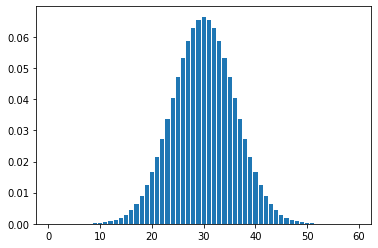

In [102]:
# You want to get lunch at La Panaderia, but notice that the line is usually very long
# at lunchtime. After several weeks of careful observation, you notice that the average
# number of people in line when your lunch break starts is normally distributed with a 
# mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, 
# and 10 minutes from ordering to getting your food, what is the likelihood that you have 
# at least 15 minutes left to eat your food before you have to go back to class?
# Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

# 2 minutes per order
# mean = 15
# std = 3

mean_wait_time = 30
std_wait_time = 6

#10 minutes to get your order
#15 minutes to eat
# 60 minutes for lunch
#60 - 10 - 15 - 2 = 33 minutes to wait in line
# find p that you have 

x = range(1,60)
y = stats.norm(mean_wait_time, std_wait_time).pdf(x)
plt.bar(x , y)

(array([  2.,   2.,   2.,   3.,   8.,   4.,  19.,  18.,  30.,  26.,  35.,
         59.,  65.,  71., 115., 123., 143., 200., 215., 240., 292., 300.,
        346., 407., 424., 431., 422., 473., 452., 540., 514., 526., 428.,
        432., 364., 356., 337., 239., 239., 204., 173., 148., 136., 111.,
         71.,  54.,  60.,  28.,  28.,  19.,  25.,  11.,  12.,   7.,   3.,
          6.,   1.,   0.,   0.,   1.]),
 array([ 9.01638657,  9.73992888, 10.4634712 , 11.18701351, 11.91055583,
        12.63409814, 13.35764045, 14.08118277, 14.80472508, 15.5282674 ,
        16.25180971, 16.97535202, 17.69889434, 18.42243665, 19.14597897,
        19.86952128, 20.5930636 , 21.31660591, 22.04014822, 22.76369054,
        23.48723285, 24.21077517, 24.93431748, 25.6578598 , 26.38140211,
        27.10494442, 27.82848674, 28.55202905, 29.27557137, 29.99911368,
        30.722656  , 31.44619831, 32.16974062, 32.89328294, 33.61682525,
        34.34036757, 35.06390988, 35.78745219, 36.51099451, 37.23453682,
      

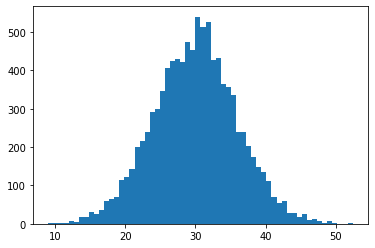

In [109]:
theory = stats.norm(mean_wait_time, std_wait_time).cdf(33)
sim_array = stats.norm(mean_wait_time, std_wait_time).rvs(10_000)
sim = (sim_array <= 33).mean()
plt.hist(sim_array, bins = 60)

In [110]:
theory, sim

(0.6914624612740131, 0.7006)

In [122]:
# Connect to the employees database and find the average salary of current employees, 
# along with the standard deviation. Model the distribution of employees salaries 
# with a normal distribution and answer the following questions:
from env import get_db
url = get_db('employees')
pd.read_sql('SHOW TABLES', url)

,Tables_in_employees
0,current_dept_emp
1,departments
2,dept_emp
3,dept_emp_latest_date
4,dept_manager
5,employees
6,employees_with_departments
7,salaries
8,titles


In [125]:
# only current salaries 
pd.read_sql('SELECT * FROM salaries WHERE to_date > now() LIMIT 5', url)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [143]:
#descriptive statistics

salaries = pd.read_sql('SELECT * FROM salaries WHERE to_date > now()', url)
salaries
mean = salaries.salary.mean()
std = salaries.salary.std()
mean, std

(72012.23585730705, 17309.99538025198)

(array([2.2396e+04, 5.6290e+04, 6.6878e+04, 4.7320e+04, 2.7247e+04,
        1.3343e+04, 5.0560e+03, 1.3390e+03, 2.2800e+02, 2.7000e+01]),
 array([ 38623. ,  50582.7,  62542.4,  74502.1,  86461.8,  98421.5,
        110381.2, 122340.9, 134300.6, 146260.3, 158220. ]),
 <a list of 10 Patch objects>)

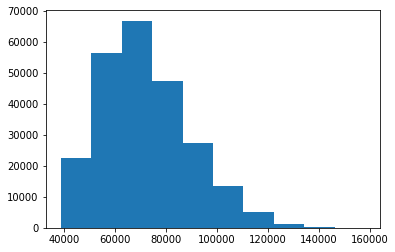

In [142]:
plt.hist(salaries.salary)

(array([4.3480e+03, 1.8048e+04, 2.5339e+04, 3.0951e+04, 3.3931e+04,
        3.2947e+04, 2.6706e+04, 2.0614e+04, 1.5698e+04, 1.1549e+04,
        8.1640e+03, 5.1790e+03, 3.1660e+03, 1.8900e+03, 9.5000e+02,
        3.8900e+02, 1.6600e+02, 6.2000e+01, 1.6000e+01, 1.1000e+01]),
 array([ 38623.  ,  44602.85,  50582.7 ,  56562.55,  62542.4 ,  68522.25,
         74502.1 ,  80481.95,  86461.8 ,  92441.65,  98421.5 , 104401.35,
        110381.2 , 116361.05, 122340.9 , 128320.75, 134300.6 , 140280.45,
        146260.3 , 152240.15, 158220.  ]),
 <a list of 20 Patch objects>)

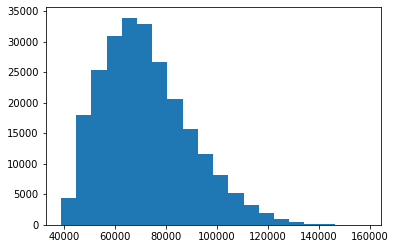

In [156]:
actual = salaries.salary
plt.hist(actual, bins = 20)

In [157]:
# What percent of employees earn less than 60,000?
theory = stats.norm(mean, std)
actual_6 = (actual < 60_000).mean()
theory.cdf(60_000), actual_6

(0.24385742480214423, 0.2705727041028802)

In [158]:
# What percent of employees earn more than 95,000?
actual_95 = (actual > 95_000).mean()
theory.sf(95_000), actual_95

(0.09208819199804053, 0.1086272092752078)

In [ ]:
# What percent of employees earn between 65,000 and 80,000?


In [163]:
# What do the top 5% of employees make?
theory.isf(.05),

actual.sort_values(ascending = True)



122944     38623
116901     38936
161628     38942
4707       39012
104928     39036
           ...  
79658     155190
123369    155513
30486     155709
123787    156286
26990     158220
Name: salary, Length: 240124, dtype: int64